In [146]:
%matplotlib inline
import json, requests, random
import numpy as np
import matplotlib as plt
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [148]:
!ls /Users/joelsimon/Projects/Antimander/repo/view/data/

WI                     WI_NO_GROWTH           WI_eth_nsga3
WI_FIF                 WI_NO_GROWTH_NO_REPAIR _2_objs
WI_FIF_NOVELTY         WI_NSGA3               _old
WI_NOV                 WI_NSGA3_50_partition  _old2
WI_NOV_FIRST           WI_big                 test
WI_NOV_big             WI_eth


In [149]:
# state_path = '/Users/joelsimon/Projects/Antimander/repo/view/data/WI/state_4.json'
state_path = '/Users/joelsimon/Projects/Antimander/blog/data/all_compactness/state_3.json'
with open(state_path, 'r') as file:
    state_data = json.load(file)

In [150]:
len(state_data['shapes'])

1744

In [151]:
r = 1024*2
img = np.zeros((r, r, 3), dtype='uint8')
x0, y0, x1, y1 = state_data['bbox']
scale = min(r/(x1-x0), r/(y1-y0))
bottom = np.array([x0, y0])

for idx, multipoly in enumerate(state_data['shapes']):
    for shape in multipoly:
        array = np.array(shape[:-1])
        array = (array - bottom) * scale
        array = array.astype('i')
        array = array.reshape((-1,1,2))
        j = idx + 1
        cv2.fillPoly(img, [array], ((j >> 16)&255, (j >> 8)&255, j&255))
#     if idx > 255:
#         print(((j >> 16)&255, (j >> 8)&255, j&255))
print(idx)
img = img[::-1]

1743


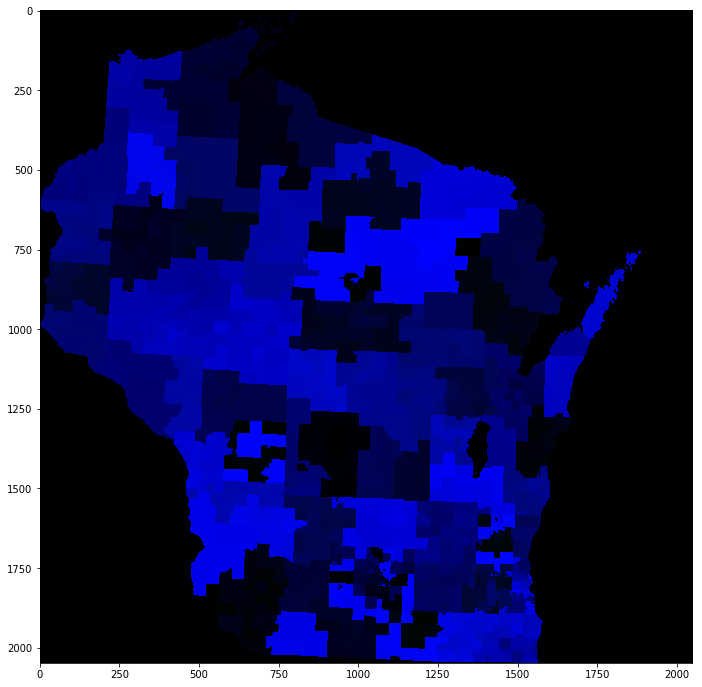

In [152]:
plt.figure(figsize=(12,12))
# plt.imshow(img, cmap='gray')
plt.imshow(img)

In [153]:
np.unique(img).shape

(256,)

In [154]:
cv2.imwrite('wards_dr.png', img[:, :, ::-1])

True

In [155]:
with open('data/all_compactness/state_data.json', 'w') as file:
    json.dump({ 'voters': state_data['voters'], 'population':  state_data['population'] }, file)